In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(0)

## Define ODE of interest, eg. bi-stable ODE
### with one un-stable fixed point and two stable fixed points

In [3]:
def fz(z):
    return (-(z+1.5)*(z-0.5)*(z-2.5))/10

# Set up the grid
zrnge = 3 # Grid endpoints
dz = 0.01  # Grid spacing
zgrid = np.arange(-zrnge, zrnge + dz, dz).reshape(-1,1)

# Evaluate the ODE at each z value
fgrid = fz(zgrid)  # ODE evaluated at grid points
Ytarg = fgrid  # Target 
fgrid.shape,Ytarg.shape

((601, 1), (601, 1))

## Set up low-rank RNN without inputs

In [4]:
# Number of neurons
nneur = 50

# Set parameters
mvec = np.sort(0.5*np.random.randn(nneur)).reshape(-1,1)  # Column vector m
print("Mvec shape: ",mvec.shape)

Mvec shape:  (50, 1)


In [5]:
# Create design matrix
Xd = np.tanh(zgrid@mvec.T)  # Basis functions 'g(m*z)'
print("Design matrix shape: ", Xd.shape)
print("Target shape: ", Ytarg.shape)

Design matrix shape:  (601, 50)
Target shape:  (601, 1)


In [6]:
# Solve for n vector using ridge regression
lambda_ = 0.001  # Ridge parameter
nvec = np.linalg.solve(Xd.T @ Xd + lambda_ * np.eye(nneur), Xd.T @ Ytarg)  # Ridge solution for n vector

# Fitted ODE
fgrid_fit = Xd @ nvec # Fitted ODE

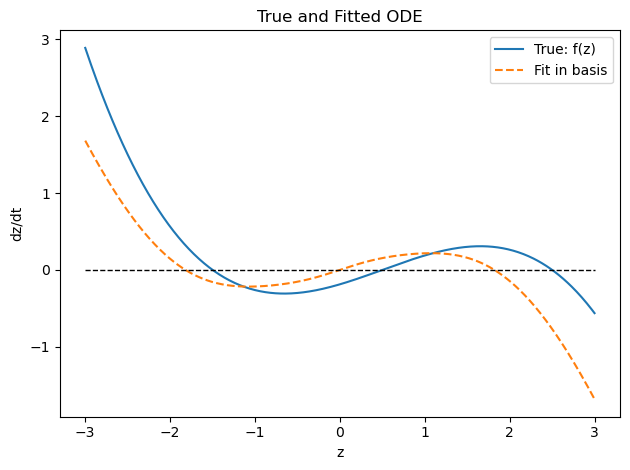

In [7]:
# Plot true and fitted ODE
# plt.figure(figsize=(3, 3))
plt.plot(zgrid, fgrid, label='True: f(z)')
plt.plot(zgrid, fgrid_fit, '--', label='Fit in basis')
plt.plot(zgrid, zgrid * 0, 'k--', linewidth=1)
plt.title('True and Fitted ODE')
plt.xlabel('z')
plt.ylabel('dz/dt')
plt.legend()
plt.tight_layout()
plt.show()

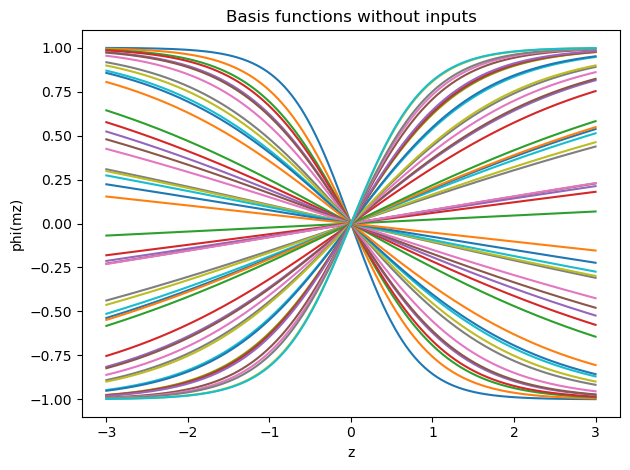

In [15]:
plt.plot(zgrid, Xd)
plt.title('Basis functions without inputs')
plt.xlabel('z')
plt.ylabel('phi(mz)')
plt.tight_layout()
plt.show()

## Set up low-rank RNN with inputs

In [9]:
b = np.random.randn(nneur)*2
b= b.reshape(-1,1) # Input vector offset per neuron

# # Orthogonalize input vector and m
b -= (mvec@b.T)@mvec / (mvec.T@mvec)

print("Input vector shape: ",b.shape)

Input vector shape:  (50, 1)


In [10]:
Xd_2 = np.tanh(zgrid@mvec.T + b.T)  # Basis functions 'g(m*z)'
print("Design matrix shape WITH Inpus: ", Xd.shape)
print("Target shape: ", Ytarg.shape)

Design matrix shape WITH Inpus:  (601, 50)
Target shape:  (601, 1)


In [11]:
# Solve for n vector using ridge regression
lambda_ = 0.001  # Ridge parameter
nvec = np.linalg.solve(Xd_2.T @ Xd_2 + lambda_ * np.eye(nneur), Xd_2.T @ Ytarg)  # Ridge solution for n vector

# Fitted ODE
fgrid_fit = Xd_2 @ nvec # Fitted ODE

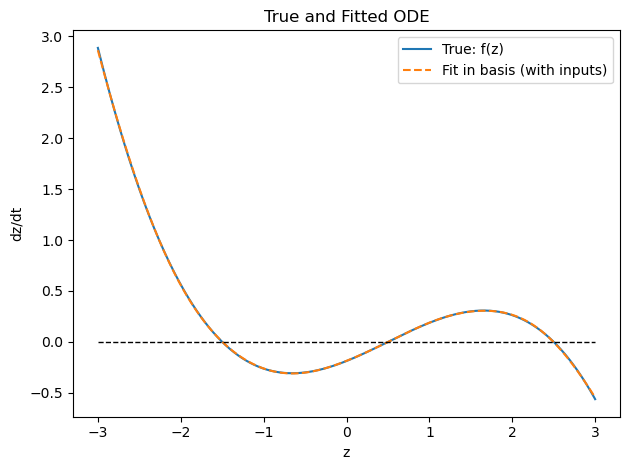

In [12]:
# Plot true and fitted ODE
# plt.figure(figsize=(3, 3))
plt.plot(zgrid, fgrid, label='True: f(z)')
plt.plot(zgrid, fgrid_fit, '--', label='Fit in basis (with inputs)')
plt.plot(zgrid, zgrid * 0, 'k--', linewidth=1)
plt.title('True and Fitted ODE')
plt.xlabel('z')
plt.ylabel('dz/dt')
plt.legend()
plt.tight_layout()
plt.show()

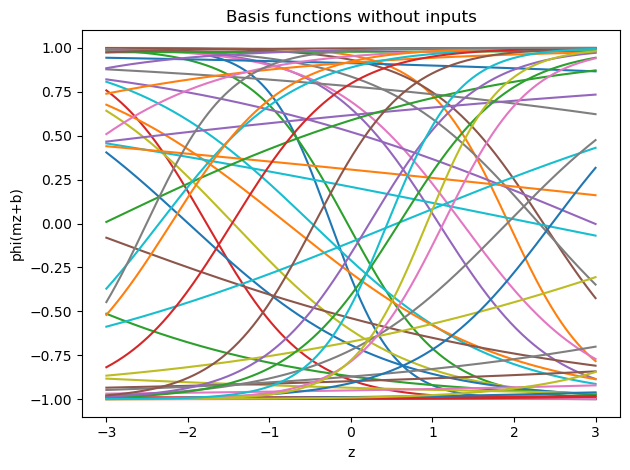

In [14]:
plt.plot(zgrid, Xd_2)
plt.title('Basis functions without inputs')
plt.xlabel('z')
plt.ylabel('phi(mz+b)')
plt.tight_layout()
plt.show()